# Plotting for LaTeX Documents

It is important to present your research results in an informative and appealing way.

This notebook describes how you can easily adjust the size of your figures so they look nice in your LaTeX paper. 

Along with this notebook comes a custom style template for Matplotlib that has the most important parameters configured for professional scientific visualizations. 

This document also demonstrates how you can import this style template and adjust the parameters according to your needs. 


## Determine the Textwidth of Your Document

In order to determine the proper `figsize` of your plots, you first need to determine the textwidth of our documentclass. 

You can do this via the `\showthe` command in the LaTeX document:

```latex
% your document class here
\documentclass{article}
\begin{document}

% gives the width of the current document in pts
\showthe\textwidth

\end{document}
```

When we compile the `.tex` document, compilation will halt once the `\showthe` command is encountered. 
At this point the textwidth of the document is displayed:

```latex
> 434.64355pt.
l.149 \showthe\textwidth
```

You can now use the `set_size()` function below to convert pts into inches. 

In [1]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in your LaTeX document. 
    From: https://jwalton.info/Matplotlib-latex-PGF/

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the document width you want the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of your subplots
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [2]:
set_size(434.64355, fraction=1, subplots=(1, 1))

(6.014162861491629, 3.7169570622791532)

## Using Your Own Stylesheet

An easy way to create plots with consistent quality is to use a customized Matplotlib stylesheet. 

For example, the stylesheet `dominik.mplstyle` can be loaded in Matplotlib using:

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

plt.style.use('dominik.mplstyle')

### Matching Fonts

There might be a **difference** between the font used by Matplotlib for displaying the plot (e.g. in Jupyter) and the font applied in your LaTeX document. 

To match the font between our plot and LaTeX, it is sufficient to instruct Matplotlib to use the same font to typeset the text. 

To achieve this, we can update our `rcParams` as:

```python
plt.rcParams["font.family"] = "Latin Modern Roman"
```

**Important note:** Make sure the font you want to apply is installed on your system! 

#### Caveats

This solution works fine, when you try to export your plot in PDF format.  
However, it **might not work**, when you try to export your figure in the [PGF](https://de.wikipedia.org/wiki/PGF/TikZ) format. 

The LaTeX compiler tends to crash, when it tries to add the `.pgf` export of your plot to the document (something about `\setmainfont` not found). 

However, to match the font between our plot and LaTeX, it is probably enough to instruct matplotlib to use a `serif` font to typeset the text, which is currently the default in the custom stylesheet. 

## Examples

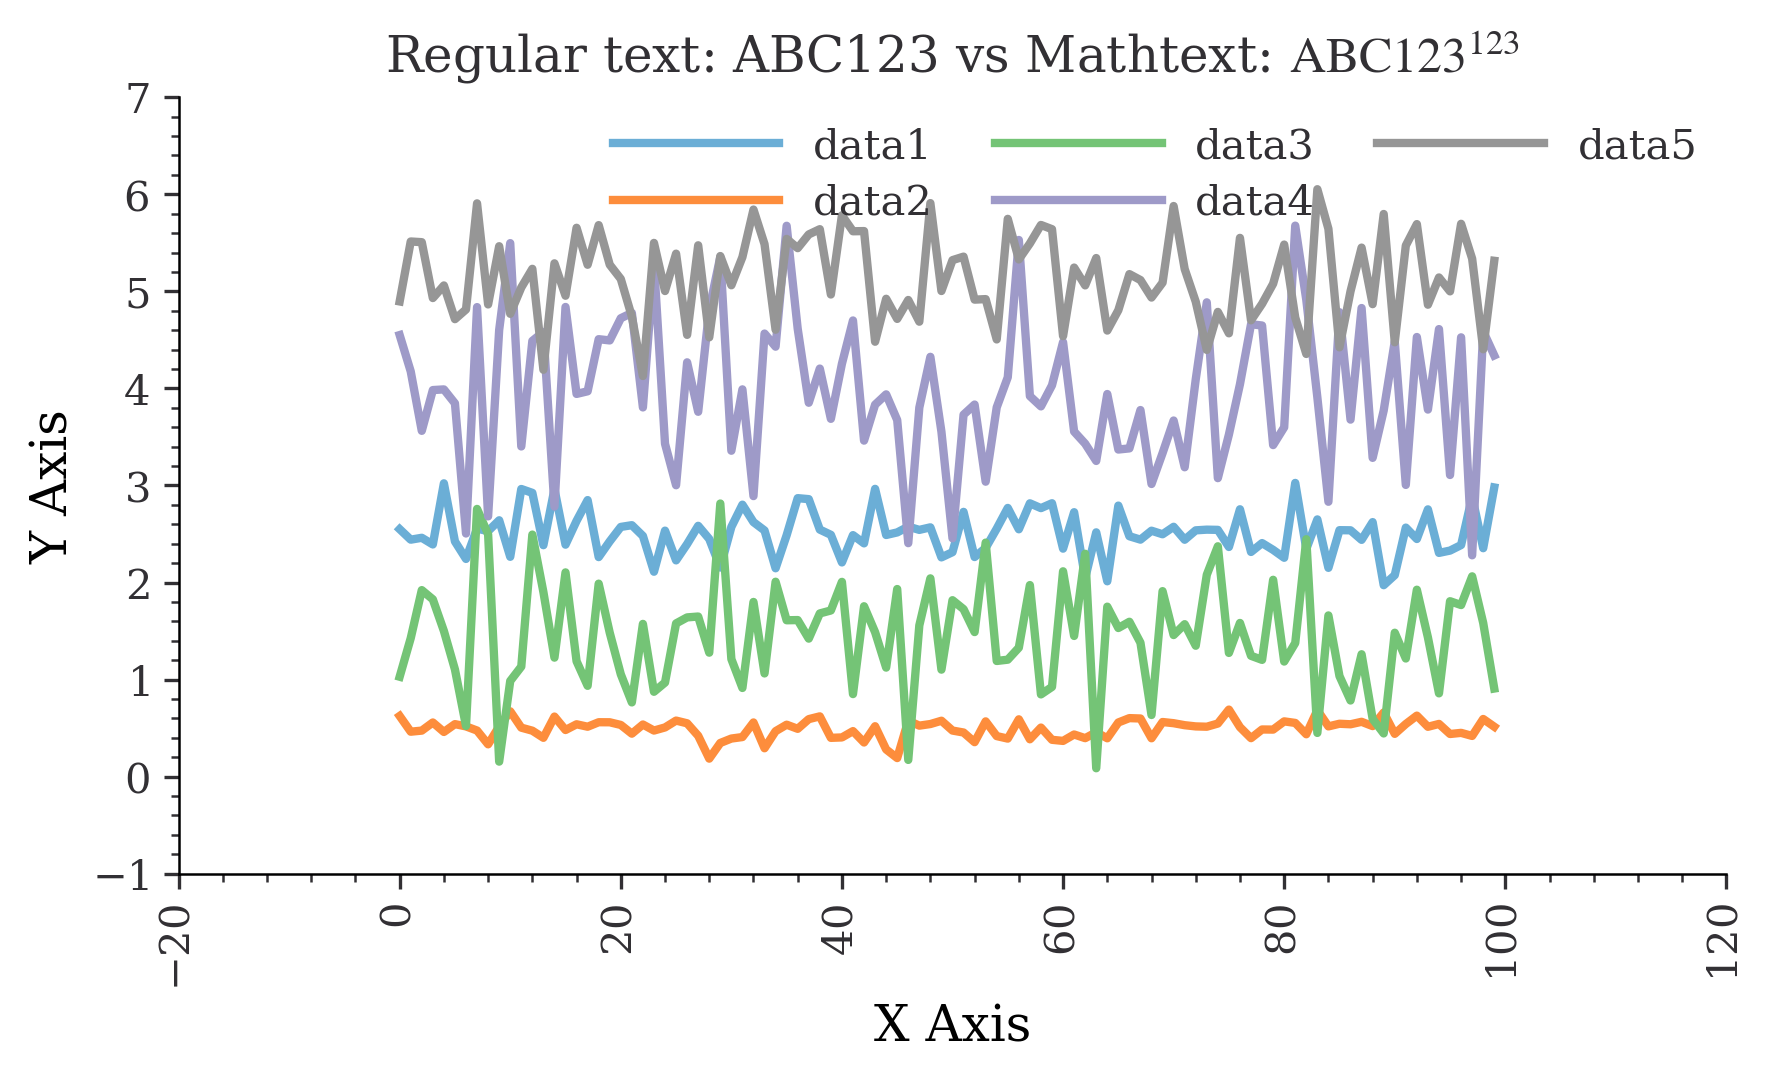

In [5]:
import random 

plt.close('all')
figsize_inches = set_size(434.64355, fraction=1, subplots=(1, 1))

fig, ax = plt.subplots(figsize=figsize_inches)

ax.plot([random.gauss(2.5, 0.25) for i in range(100)], label="data1")
ax.plot([random.gauss(0.5, 0.1) for i in range(100)], label="data2")
ax.plot([random.gauss(1.5, 0.5) for i in range(100)], label="data3")
ax.plot([random.gauss(4, 0.75) for i in range(100)], label="data4")
ax.plot([random.gauss(5.1, 0.45) for i in range(100)], label="data5")

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.tick_params(axis='x', which='minor', bottom=False) # Turn off minor ticks
plt.xticks(rotation=90)

plt.title(r'Regular text: ABC123 vs Mathtext: $\mathrm{ABC123}^{123}$')


# ax.yaxis.tick_right() # Put ticks and tick labels of y axis on right side
ax.legend(frameon=False, loc='upper right', ncol=3, handlelength=4)
plt.tight_layout()


# plt.savefig('test.pdf')
# plt.savefig('test.pgf')
plt.show()

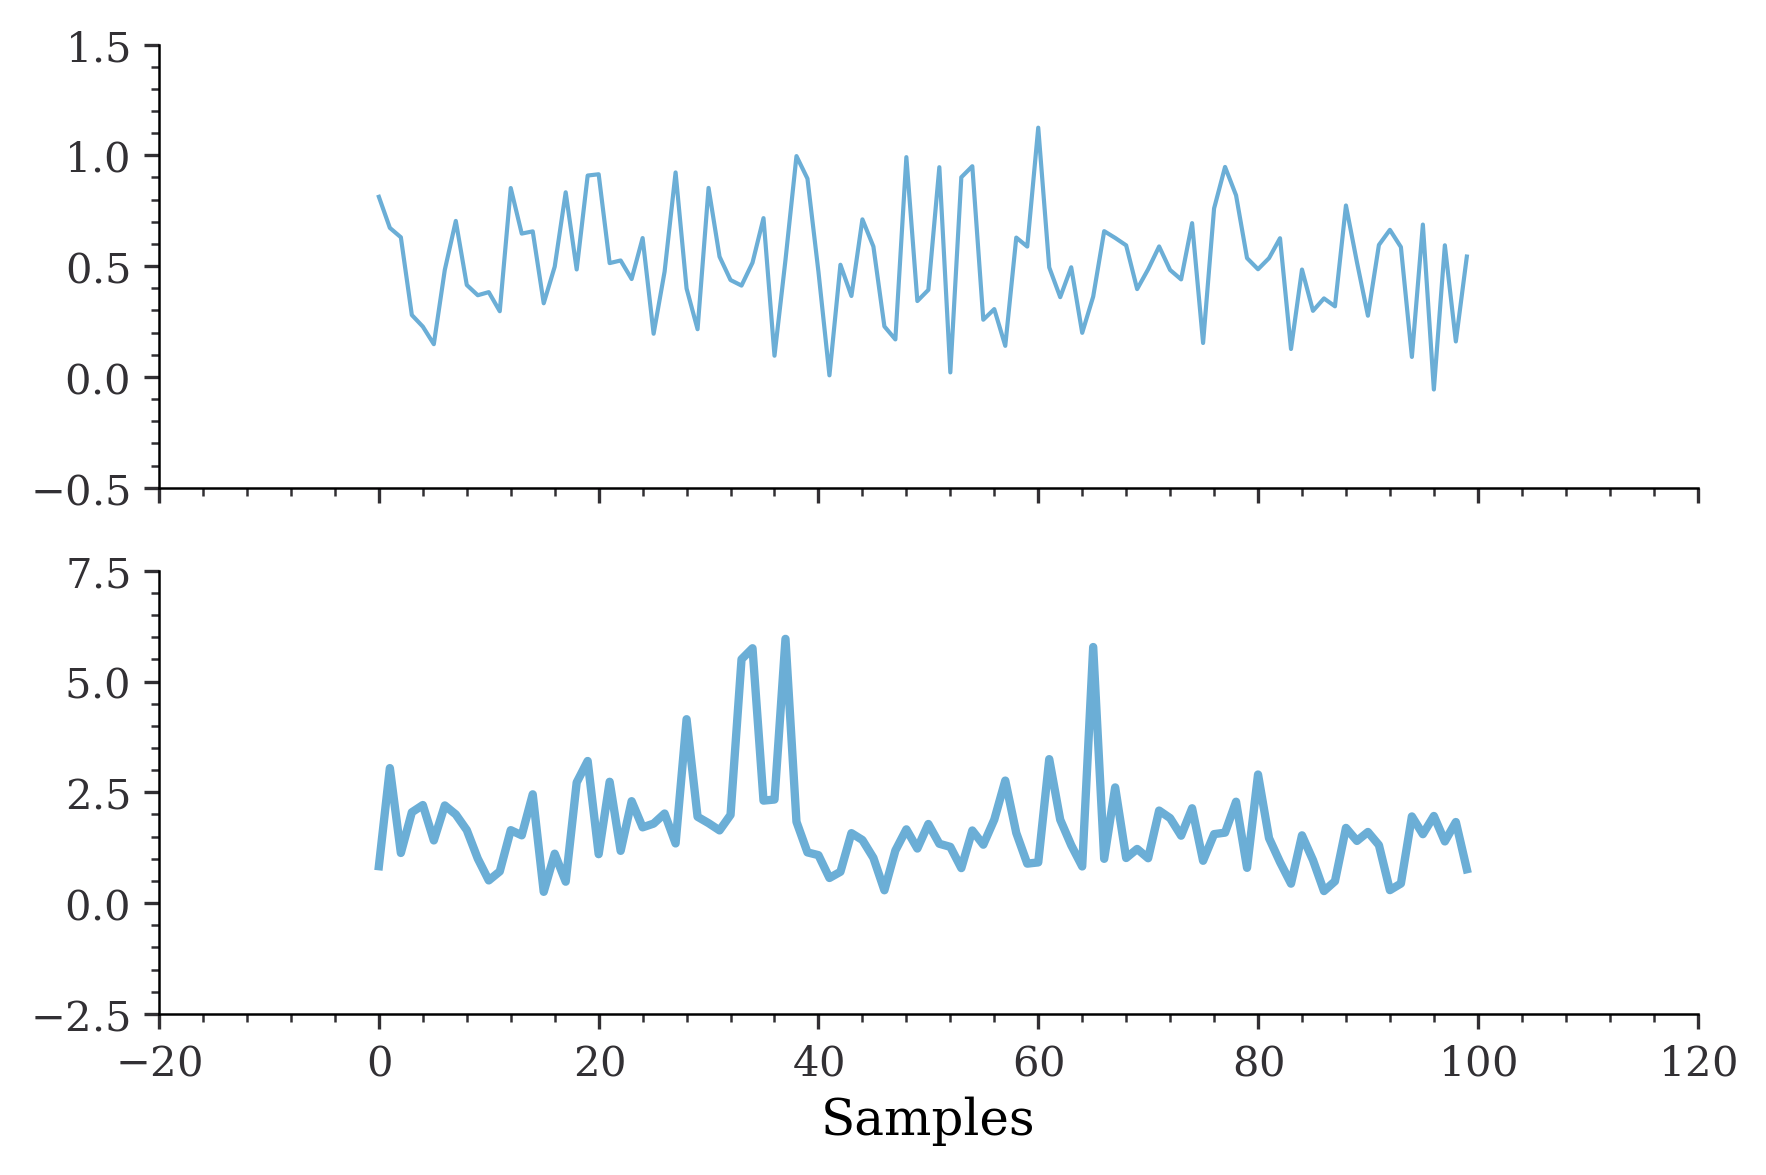

In [6]:
import random 

plt.close('all')
fig, ax = plt.subplots(2, 1, sharex='col')

ax[0].plot([random.gauss(0.5, 0.25) for i in range(100)], linewidth=1.0)
ax[1].plot([random.vonmisesvariate(1.5, 2.25) for i in range(100)])

ax[1].set_xlabel('Samples')

ax[0].yaxis.set_major_formatter(ScalarFormatter())
ax[1].yaxis.set_major_formatter(ScalarFormatter())

ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(5))

ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.tight_layout()

## Checkout Color Palettes

Sometimes it's useful to get the colorcodes from the [default palettes](https://matplotlib.org/stable/tutorials/colors/colormaps.html) provided by Matplotlib:

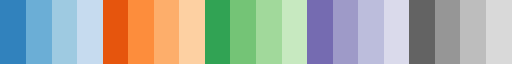

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as c

plt.cm.tab20c

In [8]:
for i, color in enumerate(plt.cm.tab20c.colors): 
    print(f"#{i+1}: {c.to_hex(color, keep_alpha=False)}")

#1: #3182bd
#2: #6baed6
#3: #9ecae1
#4: #c6dbef
#5: #e6550d
#6: #fd8d3c
#7: #fdae6b
#8: #fdd0a2
#9: #31a354
#10: #74c476
#11: #a1d99b
#12: #c7e9c0
#13: #756bb1
#14: #9e9ac8
#15: #bcbddc
#16: #dadaeb
#17: #636363
#18: #969696
#19: #bdbdbd
#20: #d9d9d9


## Saving the Plot
You can save the plot by using:
```python
plt.savefig('plot_name.pdf')
plt.savefig('plot_name.pgf')
```
Note that if you plan to embed your plot in a LaTeX document, it's probably best to use the **PGF** backend, since it **uses the font of the LaTeX document**. 

## Overriding Parameters

It is recommended to import everything via the custom Matplotlib stylesheet. 

However, you can easily override some of your `rcParams`, in case you have more specific needs that are not covered by the template:

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

plt.style.use('seaborn-paper')

# Those are the font sizes used in Korbinian Riedhammer's thesis template
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['pgf.texsystem'] = 'pdflatex'

plt.rcParams['text.usetex'] = False                # use inline math for ticks; Note: For this to work, LaTeX needs cm-super and to be installed
plt.rcParams['pgf.rcfonts'] = False                # don't setup fonts from rc parameters in pgf backend
plt.rcParams["font.family"] = "Latin Modern Roman" # this will not work with pgf (mpl warning can be ignored)
# plt.rcParams['font.family'] = ['lmodern']
# plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}' # This is the font used in Korbinian Riedhammer's thesis template

plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['font.size'] = SMALL_SIZE
# plt.rcParams['figure.autolayout'] = True # This is likely not going to work

# Size of DIN A4 Page: 8.27 x 11.69 inches
width = 7.2
height = width / 1.618                           # Golden Ratio
plt.rcParams['figure.figsize'] = [width, height] # Nature journal requires figures to be 183 mm wide, which corresponds to 7.2 inches
plt.rcParams['axes.titlesize'] = MEDIUM_SIZE
plt.rcParams['axes.labelsize'] = BIGGER_SIZE
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = SMALL_SIZE

## Troubleshooting
**Before trying anything else**, it might be a good idea to **delete** the Matplotlib cache: `rm -rf ~/.matplotlib` and let Matplotlib regenerate its fontlist by restarting the Python kernel. 

Errors like `RuntimeError: latex was not able to process the following string: b'lp'` are caused by the `plt.rcParams['text.usetex'] = True` parameter. 

You might need to install the following dependencies:
```
sudo tlmgr install dvipng
sudo tlmgr install cm-super
brew install ghostscript
```

Alternatively you can set `plt.rcParams['text.usetex']` to `False` if you don't need text handling through LaTeX and Matplotlib's *mathtext* is fine for you. 

More information on text rendering with LaTeX can be found [here](https://matplotlib.org/stable/tutorials/text/usetex.html). 
The site also provides some tips for **troubleshooting**. 

## Useful Resources
- https://www.bastibl.net/publication-quality-plots/
- http://aeturrell.com/2018/01/31/publication-quality-plots-in-python/
- http://sbillaudelle.de/2015/02/23/seamlessly-embedding-matplotlib-output-into-latex.html
- https://jwalton.info/Matplotlib-latex-PGF/
- https://aeturrell.github.io/coding-for-economists/vis-intro.html#